In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import math
%matplotlib inline
import matplotlib.dates as mdates
from datetime import datetime
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.graph_objects as go

import bt
import talib

In [2]:
dict_stocks = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name= None, parse_dates = ['Date'])
sber_rus = pd.DataFrame(dict_stocks['Russia - Sberbank Rossii PAO (S'])
kchol_tur = pd.DataFrame(dict_stocks['Turkey - Koc Holding AS (KCHOL)'])
mnhd_egy = pd.DataFrame(dict_stocks['Egypt - Medinet Nasr Housing (M'])
beef3_brz = pd.DataFrame(dict_stocks['Brazil - Minerva SABrazil (BEEF'])
pamp_arg = pd.DataFrame(dict_stocks['Argentina - Pampa Energia SA (P'])
ccb_col = pd.DataFrame(dict_stocks['Colombia - Cementos Argos SA (C'])
impj_sa = pd.DataFrame(dict_stocks['South Africa - Impala Platinum '])
_001230_sk= pd.DataFrame(dict_stocks['South Korea - Dongkuk Steel Mil'])
df_list = [sber_rus, kchol_tur, mnhd_egy, beef3_brz, pamp_arg, ccb_col, impj_sa, _001230_sk]

# SBER

In [3]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [4]:
sber_rus.tail()

Date           Price                Open             High  \
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol.  Change %  
307           257.01  38.33M   -0.0045  
308           253.03  40.82M    0.0207  
309            251.4  22.35M   -0.0043  
310            253.7  35.85M    0.0010  
311  Change %: 14.24     NaN       NaN

In [5]:
sber_rus

Date           Price                Open             High  \
0    2021-03-31 00:00:00          291.02                 294           294.42   
1    2021-03-30 00:00:00          293.25              294.86           295.72   
2    2021-03-29 00:00:00           293.3              289.72           294.09   
3    2021-03-26 00:00:00          291.22              288.63           292.75   
4    2021-03-25 00:00:00          286.66               286.5           287.03   
..                   ...             ...                 ...              ...   
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol.  Change %  
0             290.26  47.00M   -0.0076  
1              291.5  38.81M   -0.0002  
2             289.26  43.68M    0.0071  
3             288.32  56.07M    0.0159  
4             283.85  35.22M    0.0030  
..               ...     ...       ...  
307           257.01  38.33M   -0.0045  
308           253.03  40.82M    0.0207  
309            251.4  22.35M   -0.0043  
310            253.7  35.85M    0.0010  
311  Change %: 14.24     NaN       NaN  

[312 rows x 7 columns]

In [6]:
sber_rus.drop(sber_rus.tail(1).index, inplace=True)

In [7]:
sber_rus.tail()

Date   Price    Open    High     Low    Vol.  Change %
306  2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008
307  2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045
308  2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207
309  2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043
310  2020-01-03 00:00:00     255  255.99  258.19   253.7  35.85M    0.0010

In [8]:
sber_rus['Date'] = pd.to_datetime(sber_rus.Date)

In [9]:
sber_rus['Vol.'].str[-1].unique().sum()

'M'

In [10]:
#remove the hyphen
def strip_hyphen(x):
    if isinstance(x, str):
        return x.replace('-', '0')
    else: 
        return x
sber_rus['Vol.'] = sber_rus['Vol.'].map(strip_hyphen)

In [11]:
for i in range(len(sber_rus)):
    if sber_rus['Vol.'][i][-1]=='M':
        sber_rus['Vol.'][i] = float(sber_rus['Vol.'][i].replace('M', ''))*1000000

In [12]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    object        
 2   Open      311 non-null    object        
 3   High      311 non-null    object        
 4   Low       311 non-null    object        
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 17.1+ KB


In [13]:
sber_rus[["Price", "Open", "High", "Low", "Change %", 'Vol.']] = sber_rus[["Price", "Open", "High", "Low", "Change %", 'Vol.']].apply(pd.to_numeric)

In [14]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    float64       
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 17.1 KB


In [15]:
sber_rus.head()

Date   Price    Open    High     Low        Vol.  Change %
0 2021-03-31  291.02  294.00  294.42  290.26  47000000.0   -0.0076
1 2021-03-30  293.25  294.86  295.72  291.50  38810000.0   -0.0002
2 2021-03-29  293.30  289.72  294.09  289.26  43680000.0    0.0071
3 2021-03-26  291.22  288.63  292.75  288.32  56070000.0    0.0159
4 2021-03-25  286.66  286.50  287.03  283.85  35220000.0    0.0030

In [16]:
sber_rus.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

## SMA

In [17]:
df = sber_rus

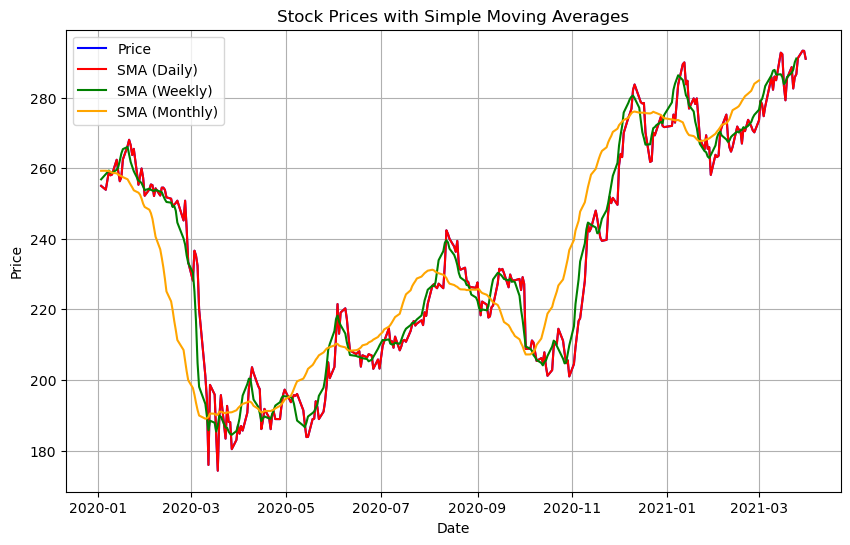

In [18]:
df['SMA_daily'] = df['Price'].rolling(window=1).mean()  # Daily SMA
df['SMA_weekly'] = df['Price'].rolling(window=5).mean()  # Weekly SMA (assuming 5 trading days in a week)
df['SMA_monthly'] = df['Price'].rolling(window=22).mean()  # Monthly SMA (assuming 22 trading days in a month)

# Step 3: Visualizations
# Plot stock prices and SMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price', color='blue')
plt.plot(df['Date'], df['SMA_daily'], label='SMA (Daily)', color='red')
plt.plot(df['Date'], df['SMA_weekly'], label='SMA (Weekly)', color='green')
plt.plot(df['Date'], df['SMA_monthly'], label='SMA (Monthly)', color='orange')
plt.title('Stock Prices with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Calculate Bollinger Bands
window_size = 20
df['Rolling_mean'] = df['Price'].rolling(window=window_size).mean()
df['Rolling_std'] = df['Price'].rolling(window=window_size).std()
df['Upper_band'] = df['Rolling_mean'] + 2 * df['Rolling_std']
df['Lower_band'] = df['Rolling_mean'] - 2 * df['Rolling_std']

# Generate recommendations
recommendations = []
for i in range(len(df)):
    if df['Price'][i] > df['Upper_band'][i]:
        recommendations.append('SELL')
    elif df['Price'][i] < df['Lower_band'][i]:
        recommendations.append('BUY')
    else:
        recommendations.append('HOLD')

df['Recommendation'] = recommendations

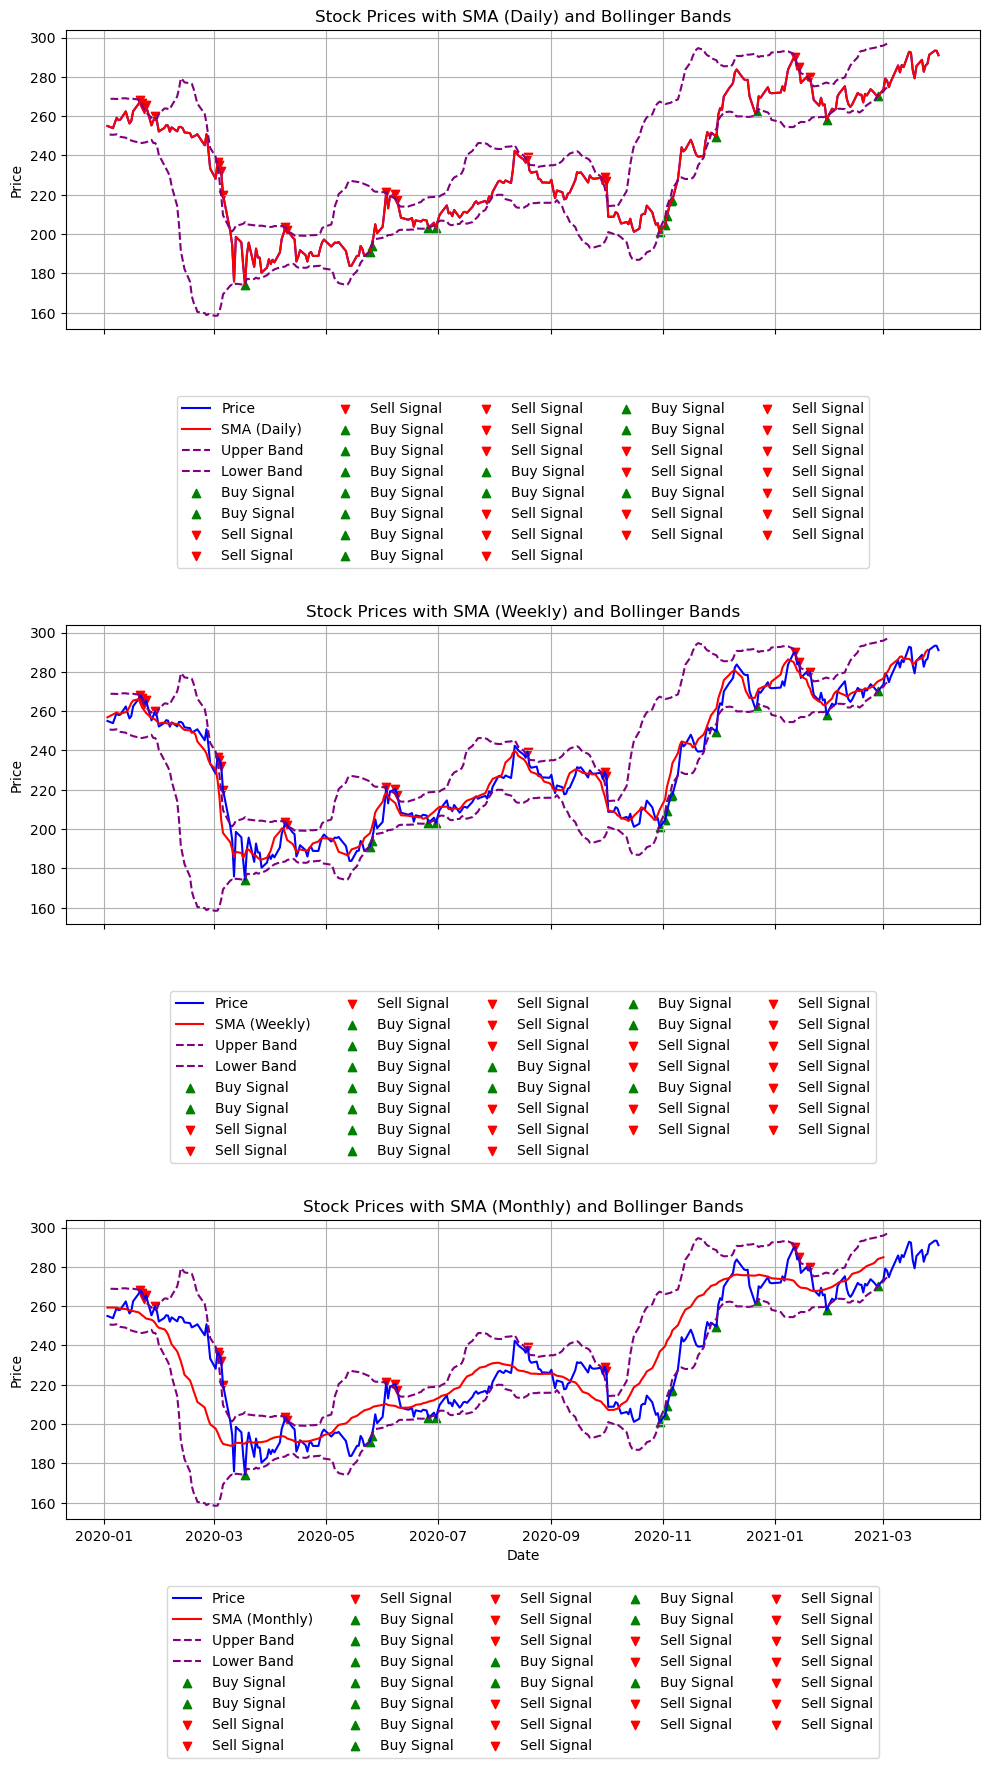

In [20]:
# Create subplots for daily, weekly, and monthly intervals
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Plot for Daily Interval
axs[0].plot(df['Date'], df['Price'], label='Price', color='blue')
axs[0].plot(df['Date'], df['SMA_daily'], label='SMA (Daily)', color='red')
axs[0].plot(df['Date'], df['Upper_band'], label='Upper Band', color='purple', linestyle='--')
axs[0].plot(df['Date'], df['Lower_band'], label='Lower Band', color='purple', linestyle='--')
for i in range(len(df)):
    if df['Recommendation'][i] == 'BUY':
        axs[0].scatter(df['Date'][i], df['Price'][i], color='green', marker='^', label='Buy Signal')
    elif df['Recommendation'][i] == 'SELL':
        axs[0].scatter(df['Date'][i], df['Price'][i], color='red', marker='v', label='Sell Signal')
axs[0].set_title('Stock Prices with SMA (Daily) and Bollinger Bands')
axs[0].set_ylabel('Price')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
axs[0].grid(True)

# Plot for Weekly Interval
axs[1].plot(df['Date'], df['Price'], label='Price', color='blue')
axs[1].plot(df['Date'], df['SMA_weekly'], label='SMA (Weekly)', color='red')
axs[1].plot(df['Date'], df['Upper_band'], label='Upper Band', color='purple', linestyle='--')
axs[1].plot(df['Date'], df['Lower_band'], label='Lower Band', color='purple', linestyle='--')
for i in range(len(df)):
    if df['Recommendation'][i] == 'BUY':
        axs[1].scatter(df['Date'][i], df['Price'][i], color='green', marker='^', label='Buy Signal')
    elif df['Recommendation'][i] == 'SELL':
        axs[1].scatter(df['Date'][i], df['Price'][i], color='red', marker='v', label='Sell Signal')
axs[1].set_title('Stock Prices with SMA (Weekly) and Bollinger Bands')
axs[1].set_ylabel('Price')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
axs[1].grid(True)

# Plot for Monthly Interval
axs[2].plot(df['Date'], df['Price'], label='Price', color='blue')
axs[2].plot(df['Date'], df['SMA_monthly'], label='SMA (Monthly)', color='red')
axs[2].plot(df['Date'], df['Upper_band'], label='Upper Band', color='purple', linestyle='--')
axs[2].plot(df['Date'], df['Lower_band'], label='Lower Band', color='purple', linestyle='--')
for i in range(len(df)):
    if df['Recommendation'][i] == 'BUY':
        axs[2].scatter(df['Date'][i], df['Price'][i], color='green', marker='^', label='Buy Signal')
    elif df['Recommendation'][i] == 'SELL':
        axs[2].scatter(df['Date'][i], df['Price'][i], color='red', marker='v', label='Sell Signal')
axs[2].set_title('Stock Prices with SMA (Monthly) and Bollinger Bands')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [21]:
# Define initial balances for each interval
initial_balance_daily = 10000  # Initial investment balance for daily interval
initial_balance_weekly = 10000  # Initial investment balance for weekly interval
initial_balance_monthly = 10000  # Initial investment balance for monthly interval

# Calculate capital returns for daily interval
balance_daily = initial_balance_daily
for i in range(1, len(df)):
    if df['Recommendation'][i] == 'BUY':
        balance_daily -= df['Price'][i]  # Buy stock
    elif df['Recommendation'][i] == 'SELL':
        balance_daily += df['Price'][i]  # Sell stock

returns_daily = (balance_daily - initial_balance_daily) / initial_balance_daily * 100

# Calculate capital returns for weekly interval
balance_weekly = initial_balance_weekly
for i in range(1, len(df), 5):  # Assuming 5 trading days in a week
    if df['Recommendation'][i] == 'BUY':
        balance_weekly -= df['Price'][i]  # Buy stock
    elif df['Recommendation'][i] == 'SELL':
        balance_weekly += df['Price'][i]  # Sell stock

returns_weekly = (balance_weekly - initial_balance_weekly) / initial_balance_weekly * 100

# Calculate capital returns for monthly interval
balance_monthly = initial_balance_monthly
for i in range(1, len(df), 22):  # Assuming 22 trading days in a month
    if df['Recommendation'][i] == 'BUY':
        balance_monthly -= df['Price'][i]  # Buy stock
    elif df['Recommendation'][i] == 'SELL':
        balance_monthly += df['Price'][i]  # Sell stock

returns_monthly = (balance_monthly - initial_balance_monthly) / initial_balance_monthly * 100

print(f'Daily Capital Returns: {returns_daily}%')
print(f'Weekly Capital Returns: {returns_weekly}%')
print(f'Monthly Capital Returns: {returns_monthly}%')


Daily Capital Returns: 18.08479999999996%
Weekly Capital Returns: 0.5628999999999906%
Monthly Capital Returns: 1.7934999999999854%


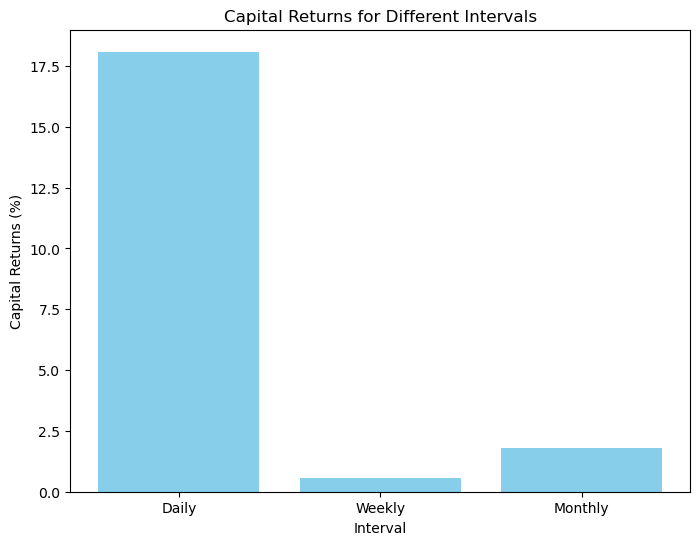

In [22]:
returns = [returns_daily, returns_weekly, returns_monthly]
intervals = ['Daily', 'Weekly', 'Monthly']

plt.figure(figsize=(8, 6))
plt.bar(intervals, returns, color='skyblue')
plt.title('Capital Returns for Different Intervals')
plt.xlabel('Interval')
plt.ylabel('Capital Returns (%)')
plt.show()

# ARIMA

In [23]:
df = sber_rus
from statsmodels.tsa.arima.model import ARIMA

In [24]:
df.set_index('Date', inplace=True)
# Ensure the data is sorted by date
df.sort_index(inplace=True)

In [25]:
def fit_arima_model(data, order):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    return fitted_model

def plot_arima_predictions(actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual, label='Actual Price', color='blue')
    plt.plot(actual.index, predicted, label='Predicted Price', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_bollinger_bands(data, window_size=20):
    rolling_mean = data.rolling(window=window_size).mean()
    rolling_std = data.rolling(window=window_size).std()
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std
    return upper_band, lower_band

In [26]:
# Fit ARIMA model and make predictions
# Daily predictions
daily_model = fit_arima_model(df['Price'], order=(5,1,0))
daily_predictions = daily_model.predict(start=min(df.index), end=max(df.index), typ='levels')

# Weekly predictions (using resampling)
weekly_data = df.resample('W').mean()
weekly_model = fit_arima_model(weekly_data['Price'], order=(5,1,0))
weekly_predictions = weekly_model.predict(start=min(weekly_data.index), end=max(weekly_data.index), typ='levels')

# Monthly predictions (using resampling)
monthly_data = df.resample('M').mean()
monthly_model = fit_arima_model(monthly_data['Price'], order=(5,1,0))
monthly_predictions = monthly_model.predict(start=min(monthly_data.index), end=max(monthly_data.index), typ='levels')

C:\Users\ibane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ibane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ibane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'upper_band' is not defined

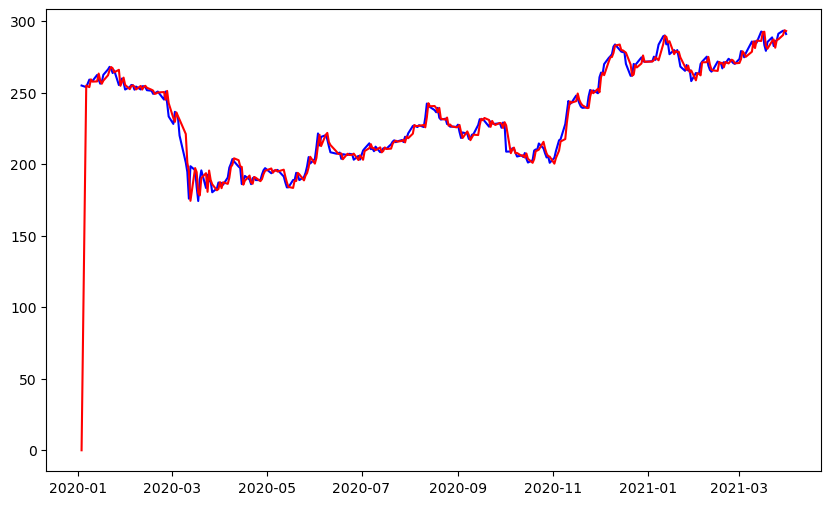

In [27]:
# Plot daily predictions with Bollinger Bands and signals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual Price', color='blue')
plt.plot(df.index, daily_predictions, label='ARIMA Predicted Price', color='red')
plt.plot(df.index, upper_band, label='Upper Band', color='purple', linestyle='--')
plt.plot(df.index, lower_band, label='Lower Band', color='purple', linestyle='--')
plt.title('ARIMA Model - Daily Predictions with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

# Add buy, sell, and hold signals
for i in range(len(df)):
    if df['Price'][i] > upper_band[i]:
        plt.scatter(df.index[i], df['Price'][i], color='green', marker='^', s=100, label='Buy Signal')
    elif df['Price'][i] < lower_band[i]:
        plt.scatter(df.index[i], df['Price'][i], color='red', marker='v', s=100, label='Sell Signal')
    else:
        plt.scatter(df.index[i], df['Price'][i], color='blue', marker='o', s=50, label='Hold Signal')

plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()



In [ ]:
# Plot weekly predictions with Bollinger Bands and signals
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Price'], label='Actual Price', color='blue')
plt.plot(weekly_data.index, weekly_predictions, label='ARIMA Predicted Price', color='red')
plt.plot(weekly_data.index, upper_band_weekly, label='Upper Band', color='purple', linestyle='--')
plt.plot(weekly_data.index, lower_band_weekly, label='Lower Band', color='purple', linestyle='--')
plt.title('ARIMA Model - Weekly Predictions with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

# Add buy, sell, and hold signals
for i in range(len(weekly_data)):
    if weekly_data['Price'][i] > upper_band_weekly[i]:
        plt.scatter(weekly_data.index[i], weekly_data['Price'][i], color='green', marker='^', s=100, label='Buy Signal')
    elif weekly_data['Price'][i] < lower_band_weekly[i]:
        plt.scatter(weekly_data.index[i], weekly_data['Price'][i], color='red', marker='v', s=100, label='Sell Signal')
    else:
        plt.scatter(weekly_data.index[i], weekly_data['Price'][i], color='blue', marker='o', s=50, label='Hold Signal')

plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

In [ ]:
# Plot monthly predictions with Bollinger Bands and signals
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Price'], label='Actual Price', color='blue')
plt.plot(monthly_data.index, monthly_predictions, label='ARIMA Predicted Price', color='red')
plt.plot(monthly_data.index, upper_band_monthly, label='Upper Band', color='purple', linestyle='--')
plt.plot(monthly_data.index, lower_band_monthly, label='Lower Band', color='purple', linestyle='--')
plt.title('ARIMA Model - Monthly Predictions with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

# Add buy, sell, and hold signals
for i in range(len(monthly_data)):
    if monthly_data['Price'][i] > upper_band_monthly[i]:
        plt.scatter(monthly_data.index[i], monthly_data['Price'][i], color='green', marker='^', s=100, label='Buy Signal')
    elif monthly_data['Price'][i] < lower_band_monthly[i]:
        plt.scatter(monthly_data.index[i], monthly_data['Price'][i], color='red', marker='v', s=100, label='Sell Signal')
    else:
        plt.scatter(monthly_data.index[i], monthly_data['Price'][i], color='blue', marker='o', s=50, label='Hold Signal')

plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

In [ ]:
# Calculate capital returns for each interval (daily, weekly, monthly)
def calculate_capital_returns(predictions, actual_prices):
    initial_balance = 10000  # Initial investment balance
    balance = initial_balance
    for i in range(1, len(predictions)):
        if predictions[i] > actual_prices[i]:
            balance -= actual_prices[i]  # Buy stock
        elif predictions[i] < actual_prices[i]:
            balance += actual_prices[i]  # Sell stock
    returns = (balance - initial_balance) / initial_balance * 100
    return returns

# Calculate daily capital returns
daily_returns = calculate_capital_returns(daily_predictions, df['Price'])

# Calculate weekly capital returns
weekly_returns = calculate_capital_returns(weekly_predictions, weekly_data['Price'])

# Calculate monthly capital returns
monthly_returns = calculate_capital_returns(monthly_predictions, monthly_data['Price'])

In [ ]:
# Print capital returns for each interval
print(f'Daily Capital Returns: {daily_returns}%')
print(f'Weekly Capital Returns: {weekly_returns}%')
print(f'Monthly Capital Returns: {monthly_returns}%')

In [ ]:
# Visualize capital returns for each interval
plt.figure(figsize=(10, 6))

# Plot daily returns
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Price'], label='Actual Price', color='blue')
plt.plot(df.index, daily_predictions, label='ARIMA Predicted Price', color='red')
plt.title('ARIMA Model - Daily Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Plot weekly returns
plt.subplot(3, 1, 2)
plt.plot(weekly_data.index, weekly_data['Price'], label='Actual Price', color='blue')
plt.plot(weekly_data.index, weekly_predictions, label='ARIMA Predicted Price', color='red')
plt.title('ARIMA Model - Weekly Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Plot monthly returns
plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data['Price'], label='Actual Price', color='blue')
plt.plot(monthly_data.index, monthly_predictions, label='ARIMA Predicted Price', color='red')
plt.title('ARIMA Model - Monthly Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# LSTM

In [31]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [32]:
data = sber_rus

In [33]:
data

Price    Open    High     Low        Vol.  Change %  SMA_daily  \
Date                                                                          
2020-01-03  255.00  255.99  258.19  253.70  35850000.0    0.0010     255.00   
2020-01-06  253.90  254.75  254.84  251.40  22350000.0   -0.0043     253.90   
2020-01-08  259.15  253.57  259.15  253.03  40820000.0    0.0207     259.15   
2020-01-09  257.99  259.40  261.76  257.01  38330000.0   -0.0045     257.99   
2020-01-10  258.19  257.86  259.25  256.88  18850000.0    0.0008     258.19   
...            ...     ...     ...     ...         ...       ...        ...   
2021-03-25  286.66  286.50  287.03  283.85  35220000.0    0.0030     286.66   
2021-03-26  291.22  288.63  292.75  288.32  56070000.0    0.0159     291.22   
2021-03-29  293.30  289.72  294.09  289.26  43680000.0    0.0071     293.30   
2021-03-30  293.25  294.86  295.72  291.50  38810000.0   -0.0002     293.25   
2021-03-31  291.02  294.00  294.42  290.26  47000000.0   -0.0076     291.02   

            SMA_weekly  SMA_monthly  Rolling_mean  Rolling_std  Upper_band  \
Date                                                                         
2020-01-03     256.846   259.270909      259.7285     4.518977  268.766453   
2020-01-06     258.326   259.280000      259.6780     4.579833  268.837666   
2020-01-08     259.356   259.198636      259.7530     4.491665  268.736330   
2020-01-09     258.788   258.978182      259.5555     4.604986  268.765473   
2020-01-10     258.692   258.717727      259.2615     4.889129  269.039758   
...                ...          ...           ...          ...         ...   
2021-03-25     291.090          NaN           NaN          NaN         NaN   
2021-03-26         NaN          NaN           NaN          NaN         NaN   
2021-03-29         NaN          NaN           NaN          NaN         NaN   
2021-03-30         NaN          NaN           NaN          NaN         NaN   
2021-03-31         NaN          NaN           NaN          NaN         NaN   

            Lower_band Recommendation  
Date                                   
2020-01-03  250.690547           HOLD  
2020-01-06  250.518334           HOLD  
2020-01-08  250.769670           HOLD  
2020-01-09  250.345527           HOLD  
2020-01-10  249.483242           HOLD  
...                ...            ...  
2021-03-25         NaN           HOLD  
2021-03-26         NaN           HOLD  
2021-03-29         NaN           HOLD  
2021-03-30         NaN           HOLD  
2021-03-31         NaN           HOLD  

[311 rows x 14 columns]

In [35]:
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data['Price'].values.reshape(-1,1))

# Splitting the dataset into train and test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
206/206 - 5s - loss: 0.1100 - 5s/epoch - 26ms/step
Epoch 2/20
206/206 - 1s - loss: 0.0351 - 683ms/epoch - 3ms/step
Epoch 3/20
206/206 - 1s - loss: 0.0263 - 864ms/epoch - 4ms/step
Epoch 4/20
206/206 - 1s - loss: 0.0222 - 906ms/epoch - 4ms/step
Epoch 5/20
206/206 - 1s - loss: 0.0183 - 816ms/epoch - 4ms/step
Epoch 6/20
206/206 - 1s - loss: 0.0145 - 757ms/epoch - 4ms/step
Epoch 7/20
206/206 - 1s - loss: 0.0110 - 698ms/epoch - 3ms/step
Epoch 8/20
206/206 - 1s - loss: 0.0081 - 664ms/epoch - 3ms/step
Epoch 9/20
206/206 - 1s - loss: 0.0055 - 741ms/epoch - 4ms/step
Epoch 10/20
206/206 - 1s - loss: 0.0038 - 907ms/epoch - 4ms/step
Epoch 11/20
206/206 - 1s - loss: 0.0026 - 914ms/epoch - 4ms/step
Epoch 12/20
206/206 - 1s - loss: 0.0020 - 863ms/epoch - 4ms/step
Epoch 13/20
206/206 - 1s - loss: 0.0018 - 668ms/epoch - 3ms/step
Epoch 14/20
206/206 - 1s - loss: 0.0017 - 683ms/epoch - 3ms/step
Epoch 15/20
206/206 - 1s - loss: 0.0016 - 770ms/epoch - 4ms/step
Epoch 16/20
206/206 - 1s - loss: 0.0

4/4 [==============================] - 0s 3ms/step


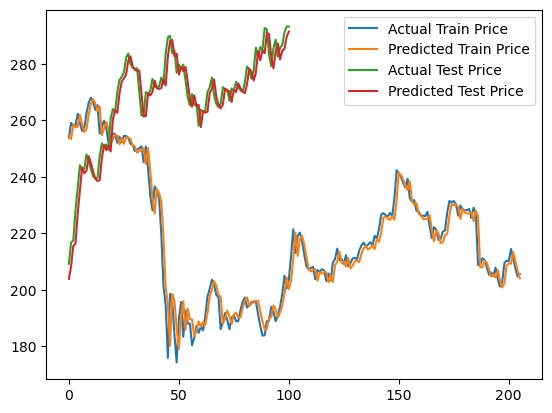

In [36]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Visualize predictions with actual values
plt.plot(trainY.flatten(), label="Actual Train Price")
plt.plot(trainPredict.flatten(), label="Predicted Train Price")
plt.plot(testY.flatten(), label="Actual Test Price")
plt.plot(testPredict.flatten(), label="Predicted Test Price")
plt.legend()
plt.show()

In [37]:
# Calculate mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.75 RMSE
Test Score: 4.69 RMSE


In [48]:
# Calculate Capital Gains
def calculate_capital_gains(data, signals):
    capital = 10000  # Initial capital
    shares = 0       # Initial number of shares
    last_buy_price = 0  # Price at which the last BUY signal was received

    for i in range(len(data)):
        if signals[i] == 'BUY':
            shares_to_buy = capital // data[i]  # Buy as many shares as possible with available capital
            shares += shares_to_buy
            capital -= shares_to_buy * data[i]
            last_buy_price = data[i]
        elif signals[i] == 'SELL':
            capital += shares * data[i]  # Sell all shares
            shares = 0
        # No action needed for 'HOLD' signals

    # If there are remaining shares at the end, sell them at the last price
    capital += shares * data[-1]

    return capital

# Calculate capital gains for train and test sets
train_capital = calculate_capital_gains(trainY.flatten(), train_signals)
test_capital = calculate_capital_gains(testY.flatten(), test_signals)

print("Capital after trading with LSTM predictions (Train): $", train_capital)
print("Capital after trading with LSTM predictions (Test): $", test_capital)

# Calculate Capital Gains as Percentage
def calculate_capital_gains_percentage(initial_capital, final_capital):
    return ((final_capital - initial_capital) / initial_capital) * 100

# Calculate capital gains for train and test sets
initial_capital = 10000  # Initial capital
train_capital = calculate_capital_gains(trainY.flatten(), train_signals)
test_capital = calculate_capital_gains(testY.flatten(), test_signals)

# Calculate capital gains as percentage
train_capital_percentage = calculate_capital_gains_percentage(initial_capital, train_capital)
test_capital_percentage = calculate_capital_gains_percentage(initial_capital, test_capital)

print("Capital gains percentage after trading with LSTM predictions (Train): {:.2f}%".format(train_capital_percentage))
print("Capital gains percentage after trading with LSTM predictions (Test): {:.2f}%".format(test_capital_percentage))



Capital after trading with LSTM predictions (Train): $ 7911.820000000001
Capital after trading with LSTM predictions (Test): $ 10525.769999999999
Capital gains percentage after trading with LSTM predictions (Train): -20.88%
Capital gains percentage after trading with LSTM predictions (Test): 5.26%
